In [1]:
# Author: Ciarán O'Brien & Chloe Doyle
# Lecture: Svetlana Hensman
# Submitted: 07/12/18
# This file is in response to the second assignment as set out per the classification goal


In [101]:
# Boiler plate imports
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import re
import cardinality
import statistics
from math import floor
from statistics import mean, median
from collections import Counter
from sympy import pretty_print as pp,latex
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [85]:
data = pd.read_csv("data/trainingset.txt",sep='\,',header=None, encoding='utf-8')

c:\users\ciaran\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [89]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,TR1,44,"""JobCat9""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
1,TR2,31,"""JobCat4""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
2,TR3,42,"""JobCat4""","""divorced""","""tertiary""","""yes""",2,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
3,TR4,58,"""JobCat2""","""married""","""primary""","""no""",121,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""
4,TR5,43,"""JobCat9""","""single""","""secondary""","""no""",593,"""yes""","""no""","""unknown""",5,"""may""",0,1,-1,0,"""unknown""","""TypeA"""


# TODO 
Look at removing all the "" from the values entries

## Optional
set the headers from a regex apllied to the text file provided by Svetlana 

In [119]:

# with open('data/datadescription.txt', 'r') as myfile:
#     filedata=myfile.read().replace('\n', '')

In [91]:
# expression = re.compile("((100)|[1-9]\d? - \b[^\d\W]+\b)")
# regx = '(100)|[1-9]\d? - \b[^\d\W]+\b'


# match = re.findall(regx,filedata)
# print(match)
#     #print(re.search(expression,str(dataFeatures[rows])))

In [92]:
data.columns = ["id","age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]

In [115]:
# LabelEncoding give a sequencial ID to each unique string value in a column
labelEncoder = preprocessing.LabelEncoder()
jobDataEncoded = labelEncoder.fit(data.job)

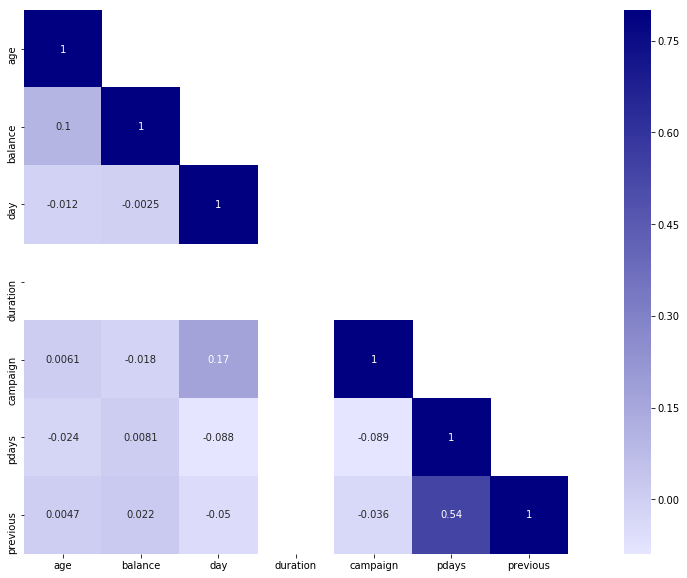

In [98]:
# Heatmap of the coeffecients 
# Shows how dependant each column is on each other 
# Needs the encoding above to work
my_cmap = sn.light_palette("Navy", as_cmap=True)
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True,cmap=my_cmap)

In [118]:
#Here we'll split the data into our training and validation sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classification
She said we can build our classifier from sklearn librayr, they have a load of classifiers compared [here.](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

Each classifier take various different values, each are outlined in the documentation